In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv(r'Cleaned Data.csv')
raw_data.columns

Index(['Unnamed: 0', 'Age', 'State', 'MTN Device', 'Gender',
       'Satisfaction Rate', 'Customer Review', 'Customer Tenure in months',
       'Subscription Plan', 'Unit Price', 'Number of Times Purchased',
       'Data Usage', 'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')

In [3]:
data = raw_data.drop(['Unnamed: 0'], axis=1)

In [4]:
data.columns

Index(['Age', 'State', 'MTN Device', 'Gender', 'Satisfaction Rate',
       'Customer Review', 'Customer Tenure in months', 'Subscription Plan',
       'Unit Price', 'Number of Times Purchased', 'Data Usage',
       'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')

In [5]:
#Handling nans 
data = data.drop(['Reasons for Churn'], axis=1)

In [6]:
data

,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Data Usage,Customer Churn Status
0,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,44.48,Yes
1,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,19.79,Yes
2,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,9.64,No
3,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,197.05,No
4,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,76.34,No
...,...,...,...,...,...,...,...,...,...,...,...,...
969,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,8.14,No
970,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,154.13,No
971,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,144.64,Yes
972,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,158.49,Yes


In [7]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [8]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data[['Gender']])

data['Customer Churn Status'] =  pd.get_dummies(data['Customer Churn Status'], drop_first=True,dtype=int)
data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Age,State,MTN Device,Gender,Satisfaction Rate,Customer Review,Customer Tenure in months,Subscription Plan,Unit Price,Number of Times Purchased,Data Usage,Customer Churn Status
0,27,Kwara,4G Router,1,2,Fair,2,165GB Monthly Plan,35000,19,44.48,1
1,16,Abuja (FCT),Mobile SIM Card,0,2,Fair,22,12.5GB Monthly Plan,5500,12,19.79,1
2,21,Sokoto,5G Broadband Router,1,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,9.64,0
3,21,Sokoto,Mobile SIM Card,1,1,Poor,60,1GB+1.5mins Daily Plan,500,8,197.05,0
4,21,Sokoto,Broadband MiFi,1,1,Poor,60,30GB Monthly Broadband Plan,9000,15,76.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...
969,72,Osun,4G Router,0,3,Good,42,25GB Monthly Plan,9000,7,8.14,0
970,41,Bayelsa,5G Broadband Router,0,2,Fair,20,30GB Monthly Broadband Plan,9000,10,154.13,0
971,67,Kebbi,4G Router,1,4,Very Good,31,165GB Monthly Plan,35000,15,144.64,1
972,67,Kebbi,Mobile SIM Card,1,4,Very Good,31,7GB Monthly Plan,3500,11,158.49,1


In [9]:
data['Customer Churn Status'].value_counts(normalize=True)

Customer Churn Status
0    0.708419
1    0.291581
Name: proportion, dtype: float64

In [10]:
data = pd.get_dummies(data,drop_first=True,dtype=int)
data

,Age,Gender,Satisfaction Rate,Customer Tenure in months,Unit Price,Number of Times Purchased,Data Usage,Customer Churn Status,State_Abuja (FCT),State_Adamawa,...,Subscription Plan_20GB Monthly Plan,Subscription Plan_25GB Monthly Plan,Subscription Plan_3.2GB 2-Day Plan,Subscription Plan_300GB FUP Monthly Unlimited,Subscription Plan_30GB Monthly Broadband Plan,Subscription Plan_450GB 3-Month Broadband Plan,Subscription Plan_500MB Daily Plan,Subscription Plan_60GB Monthly Broadband Plan,Subscription Plan_65GB Monthly Plan,Subscription Plan_7GB Monthly Plan
0,27,1,2,2,35000,19,44.48,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,2,22,5500,12,19.79,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,21,1,1,60,20000,8,9.64,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21,1,1,60,500,8,197.05,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21,1,1,60,9000,15,76.34,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,72,0,3,42,9000,7,8.14,0,0,0,...,0,1,0,0,0,0,0,0,0,0
970,41,0,2,20,9000,10,154.13,0,0,0,...,0,0,0,0,1,0,0,0,0,0
971,67,1,4,31,35000,15,144.64,1,0,0,...,0,0,0,0,0,0,0,0,0,0
972,67,1,4,31,3500,11,158.49,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
x = data.drop(['Customer Churn Status'],axis=1)
y= data['Customer Churn Status']

In [12]:
y

0      1
1      1
2      0
3      0
4      0
      ..
969    0
970    0
971    1
972    1
973    1
Name: Customer Churn Status, Length: 974, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3,random_state=360)

In [14]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
x_res,y_res = rus.fit_resample(x_train,y_train)

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=360)
log_reg.fit(x_res,y_res)

y_pred_log = log_reg.predict(x_test)



In [17]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

conf_matrix = confusion_matrix(y_test,y_pred_log)
class_report = classification_report(y_test,y_pred_log)
accuracy = accuracy_score(y_test,y_pred_log)

print(conf_matrix,class_report,accuracy)

[[119  91]
 [ 37  46]]               precision    recall  f1-score   support

           0       0.76      0.57      0.65       210
           1       0.34      0.55      0.42        83

    accuracy                           0.56       293
   macro avg       0.55      0.56      0.53       293
weighted avg       0.64      0.56      0.58       293
 0.5631399317406144


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg,x,y,cv=5)
scores.mean()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.7063706053396775

## dataset not realistic to clean hence the perfect

In [19]:
df = pd.DataFrame(x)
df['Target'] = y
corr = df.corr()['Target'].abs().sort_values(ascending=False)
corr

Target                                      1.000000
State_Adamawa                               0.096470
State_Imo                                   0.086979
State_Kebbi                                 0.073688
State_Borno                                 0.070934
                                              ...   
Subscription Plan_165GB Monthly Plan        0.002449
Subscription Plan_7GB Monthly Plan          0.001752
State_Lagos                                 0.001559
State_Cross River                           0.000502
Subscription Plan_1GB+1.5mins Daily Plan    0.000030
Name: Target, Length: 69, dtype: float64

## Model importance

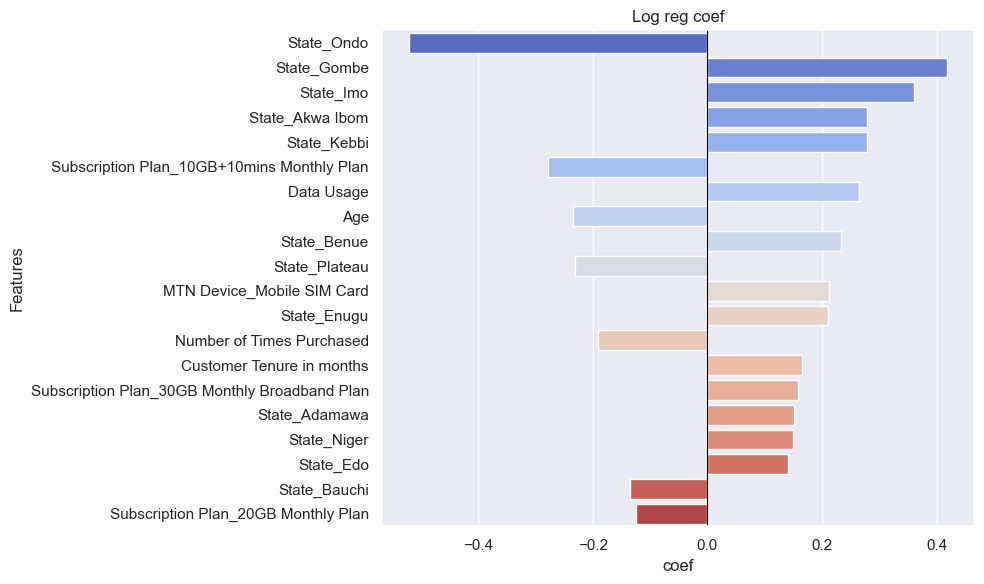

In [20]:
coefficient = np.array(log_reg.coef_).ravel()
features = np.array(x.columns).ravel()

coef_df = pd.DataFrame({'Features': features,'coef':coefficient}).sort_values(by='coef',key=abs,ascending=False)
top_10 = coef_df.head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='coef',y='Features',data=top_10,palette='coolwarm')
plt.title('Log reg coef')
plt.axvline(0,color='black',linewidth=0.8)
plt.tight_layout()
plt.show()

In [21]:
for feat , coef in zip(x.columns, log_reg.coef_[0]):
    print(f'{feat}: {coef: 4f}')

Age: -0.234681
Gender: -0.105872
Satisfaction Rate:  0.095999
Customer Tenure in months:  0.165857
Unit Price:  0.016681
Number of Times Purchased: -0.190208
Data Usage:  0.263799
State_Abuja (FCT):  0.047348
State_Adamawa:  0.150996
State_Akwa Ibom:  0.279093
State_Anambra:  0.101258
State_Bauchi: -0.135248
State_Bayelsa:  0.016810
State_Benue:  0.233717
State_Borno: -0.106496
State_Cross River:  0.114244
State_Delta: -0.110343
State_Edo:  0.140805
State_Ekiti:  0.120597
State_Enugu:  0.210140
State_Gombe:  0.418168
State_Imo:  0.360741
State_Jigawa:  0.107036
State_Kaduna:  0.004496
State_Kano:  0.017930
State_Katsina: -0.077079
State_Kebbi:  0.277692
State_Kogi: -0.011479
State_Kwara:  0.036317
State_Lagos:  0.067914
State_Nasarawa: -0.033648
State_Niger:  0.149944
State_Ondo: -0.520789
State_Osun: -0.055767
State_Oyo:  0.123383
State_Plateau: -0.231692
State_Rivers:  0.039234
State_Sokoto:  0.093616
State_Taraba:  0.105815
State_Yobe:  0.055327
State_Zamfara:  0.066237
MTN Device_5

In [22]:
log_reg.classes_

array([0, 1])